In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#以下、STOの部分を任意の名前に変える。


#まず、Excelからデータを取り込み、Dataframe型にする。

df1 = pd.read_excel('150kai_100v_t.xlsx',sheet_name='a',index=None,header=None,)#Excel
df1

,0,1,2
0,s,t,p
1,-5e-05,0.0952,0.04
2,-4.98e-05,0.096,0.04
3,-4.96e-05,0.096,0
4,-4.94e-05,0.096,0.04
...,...,...,...
2496,0.000449,0.0928,0.24
2497,0.0004492,0.0936,0.16
2498,0.0004494,0.0936,0.2
2499,0.0004496,0.0944,0.2


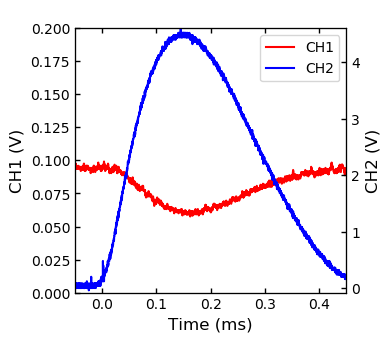

In [7]:
A = np.array(df1)
time = A[1:,0]
touka = A[1:,1]
parus = A[1:,2]
ms = time*1000

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')


plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅

fig1 = plt.figure( figsize=(3.5, 3.5),dpi=100)#figureオブジェクトからインスタンスを作成。
ax = fig1.add_subplot(111)#subplotを作成。

ax.plot(ms,touka,color='red',linestyle='-',label='CH1')#透過率の描画。色、線の種類、凡例も設定可能


ax.set_xlim([-0.05,0.45])#第1軸x軸の範囲
#ax.set_xticks([0,60,120,180,240,300,360])#第1軸x軸の主目盛

ax.set_ylim([0,0.2])#第1軸y軸の範囲
#ax.set_yticks([0,20,40,60,80,100,120,140])#第1軸y軸の主

bx = ax.twinx()
by = ax.twiny() 

bx.plot(ms,parus,color='blue',linestyle='-',label='CH2')#反射率の描画。色、線の種類、凡例も設定可能


by.set_xlim([-0.05,0.45])#第1軸x軸の範囲
#by.set_xticks([0,60,120,180,240,300,360])#第1軸x軸の主目盛
bx.set_ylim([-0.08,4.6])#第1軸y軸の範囲
#bx.set_yticks([0,20,40,60,80,100,120,140])#第1軸y軸の主

by.tick_params(labelcolor='None')#２軸のx軸の目盛り消す
bx.tick_params(labelright='on')


h1, l1 = ax.get_legend_handles_labels()#以下3行は凡例表示に必要
h2, l2 = bx.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper right')

ax.set_ylabel("CH1 (V)", {"fontsize":12})#横軸のラベルと字の大きさ設定
ax.set_xlabel("Time (ms)", {"fontsize": 12})#縦軸のラベルと字の大きさ設定
bx.set_ylabel("CH2 (V)", {"fontsize":12})#横軸のラベルと字の大きさ設定




plt.show()

In [6]:
parus.min()

-0.04

In [8]:
V_max = parus.max()
b = np.where(parus==V_max)
touka[b]

array([0.0616], dtype=object)

In [9]:
#回転角の最大値[°]を求める
I_0 = touka[0]
I = 0.0616
r = math.sqrt(I/I_0)
print(math.degrees(math.acos(r)))
print(math.degrees(math.acos(-r)))

#CH2の最大電流値[A]を求める
V_max = parus.max()
I_max = V_max*10
print(I_max)

36.44768241167811
143.5523175883219
46.0
